In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import datetime
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import os
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from scipy.stats import uniform, randint
import pickle

data = pd.read_csv(r"D:\IBM data science\final project\cleaned_data.csv")
data.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
7546,FDH24,20.700000,Low Fat,0.021552,Baking Goods,157.0288,OUT017,2007,Medium,Tier 2,Supermarket Type1,2985.4472,Food,17
1344,FDJ55,12.800000,Regular,0.039386,Meat,224.8404,OUT010,1998,Medium,Tier 3,Grocery Store,1575.2828,Food,26
6718,FDB41,12.857645,Regular,0.170383,Frozen Foods,45.2718,OUT019,1985,Small,Tier 1,Grocery Store,47.2718,Food,39
7432,FDI20,12.857645,Low Fat,0.067520,Fruits and Vegetables,211.3586,OUT019,1985,Small,Tier 1,Grocery Store,422.1172,Food,39
6837,NCP55,14.650000,Not_eatable,0.011213,Others,55.6614,OUT045,2002,Medium,Tier 2,Supermarket Type1,1049.9666,Non-Consumables,22
2493,FDH41,9.000000,Low Fat,0.081996,Frozen Foods,216.2534,OUT035,2004,Small,Tier 2,Supermarket Type1,4301.0680,Food,20
7741,NCE54,20.700000,Not_eatable,0.026900,Household,73.9354,OUT046,1997,Small,Tier 1,Supermarket Type1,677.1186,Non-Consumables,27
7063,FDS27,10.195000,Regular,0.012458,Meat,196.3110,OUT046,1997,Small,Tier 1,Supermarket Type1,589.2330,Food,27
6509,DRH25,18.700000,Low Fat,0.024426,Soft Drinks,52.9324,OUT010,1998,Medium,Tier 3,Grocery Store,51.9324,Drinks,26
4126,FDZ56,12.857645,Low Fat,0.025612,Fruits and Vegetables,168.2474,OUT027,1985,Medium,Tier 3,Supermarket Type3,3200.5006,Food,39


Data Preprocessing

Label Encoding the `Outlet_Identifier` column and adding it as a new column `Outlet` to the dataset

In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()
le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
# Correct column names
cat_col = ['Item_Identifier', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']

# Transform categorical features
for col in cat_col:
    data[col] = le.fit_transform(data[col])

find out the "object" data types columns for preprocessing before assigning it to dependent variable and independent variable

In [128]:
data.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
New_Item_Type                  int32
Outlet_Years                   int64
Outlet                         int32
dtype: object

In [6]:
cat_col = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for col in cat_col:
    data[col] = le.fit_transform(data[col])

One Hot Encoding the columns `Item_Fat_Content`,`Outlet_Size`,`Outlet_Location_Type`,`Outlet_Type`,`New_Item_Type` using  get dummies function

In [7]:
data = pd.get_dummies(data,columns = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type'])


Assigning the dependent and independent variable

In [8]:
x = data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales'],axis=1)
y=data['Item_Outlet_Sales']

In [23]:
x

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.300,0.016047,4,249.8092,25,9,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
1,5.920,0.019278,14,48.2692,15,3,False,False,True,False,...,False,False,True,False,False,True,False,True,False,False
2,17.500,0.016760,10,141.6180,25,9,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
3,19.200,0.000000,6,182.0950,26,0,False,False,True,False,...,False,False,True,True,False,False,False,False,True,False
4,8.930,0.000000,9,53.8614,37,1,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8332,6.865,0.056783,13,214.5218,37,1,True,False,False,True,...,False,False,True,False,True,False,False,False,True,False
8333,8.380,0.046982,0,108.1570,22,7,False,False,True,False,...,False,True,False,False,True,False,False,False,True,False
8334,10.600,0.035186,8,85.1224,20,6,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
8335,7.210,0.145221,13,103.1332,15,3,False,False,True,False,...,False,False,True,False,False,True,False,False,True,False


In [133]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8332    2778.3834
8333     549.2850
8334    1193.1136
8335    1845.5976
8336     765.6700
Name: Item_Outlet_Sales, Length: 8337, dtype: float64

Model Fitting

Splitting the dependent variable & independent variable into training and test dataset using train test split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [12]:
x_train

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
907,20.100000,0.074613,4,108.7228,20,6,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
3490,9.035000,0.173822,10,151.4708,22,7,False,False,True,False,...,False,True,False,False,True,False,False,False,True,False
6584,20.350000,0.151308,10,81.7276,25,9,False,False,True,False,...,True,False,False,False,True,False,False,False,True,False
4069,12.857645,0.039032,13,95.6410,39,5,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False
7271,12.100000,0.016827,7,179.1660,27,8,True,False,False,False,...,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,7.360000,0.087560,5,55.2588,26,0,True,False,False,False,...,False,False,True,True,False,False,False,False,True,False
7291,15.750000,0.135047,9,98.5700,20,6,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
1344,12.800000,0.039386,10,224.8404,26,0,False,False,True,False,...,False,False,True,True,False,False,False,False,True,False
7293,10.895000,0.027158,11,50.2666,15,3,False,True,False,False,...,False,False,True,False,False,True,False,False,False,True


In [136]:
x_test

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
3897,12.600000,0.041642,6,121.1072,22,7,False,False,True,False,...,False,True,False,False,True,False,False,False,True,False
6851,8.315000,0.035644,0,147.1444,22,7,False,False,True,False,...,False,True,False,False,True,False,False,False,True,False
6759,14.300000,0.065153,6,88.4856,37,1,False,False,True,True,...,False,False,True,False,True,False,False,False,True,False
3405,9.300000,0.043874,7,191.0846,22,7,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False
5318,6.465000,0.124759,3,264.1884,22,7,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,12.857645,0.062547,0,88.3830,39,5,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False
376,12.857645,0.000000,13,52.6666,39,5,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False
8074,11.150000,0.086282,13,170.5790,15,3,False,False,True,False,...,False,False,True,False,False,True,False,False,True,False
228,7.550000,0.027165,3,152.3340,20,6,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False


In [137]:
y_train


907     1215.7508
3490    2407.5328
6584    2030.6900
4069    1737.7380
7271    3056.0220
          ...    
4829     229.0352
7291    2496.7500
1344    1575.2828
7293     820.2656
1289     288.9572
Name: Item_Outlet_Sales, Length: 5835, dtype: float64

In [138]:
y_test

3897     980.0576
6851     870.8664
6759    1406.1696
3405    1337.5922
5318    3444.8492
          ...    
6013    2067.3090
376      717.7324
8074    1358.2320
228     2603.2780
4736    2876.2560
Name: Item_Outlet_Sales, Length: 2502, dtype: float64

Mean Squared Error: 1039300.9255736505


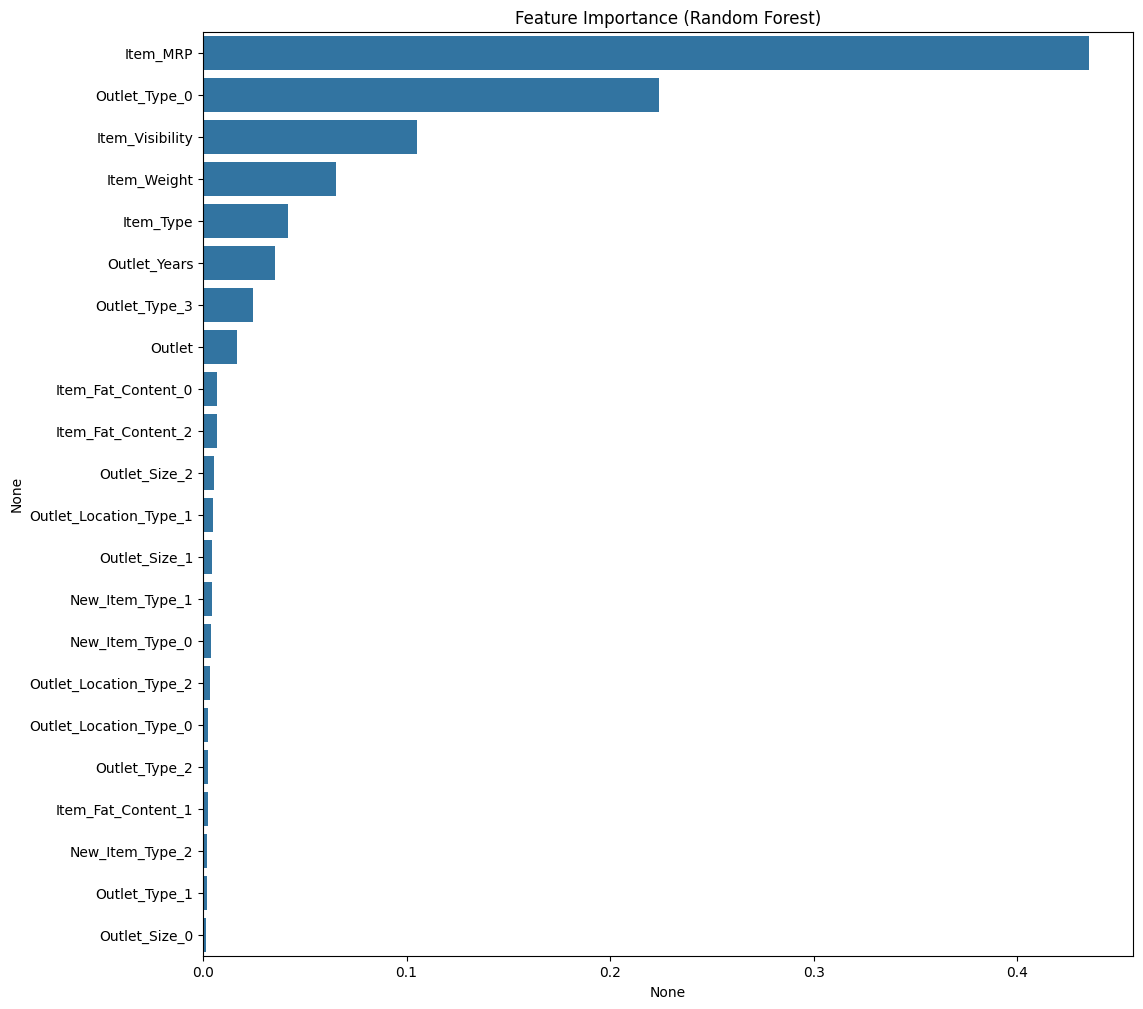

In [13]:
from sklearn.metrics import mean_squared_error 
# Initialize and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# If you need to plot feature importance from a different model like Random Forest:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest with the same data
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

# Evaluate feature importance
importance = rf_model.feature_importances_
features = x_train.columns
feature_importance = pd.Series(importance, index=features).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 12))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance (Random Forest)')
plt.show()

In [15]:
def train(model, x, y):
    model.fit(x, y)
    pred = model.predict(x)
    cv_score = cross_val_score(model,x,y,scoring = 'neg_mean_squared_error', cv = 10)
    print('Model Report : \n')
    print('Scoring - neg_mean_squared_error')
    print(cv_score,'\n')
    cv_score = np.abs(np.mean(cv_score))
    print('Absolute Average of neg_mean_squared_error : ',cv_score)
    cv_score = cross_val_score(model, x, y, cv = 10)
    print()
    print('R2 Score')
    print(cv_score,'\n')
    cv_score = np.mean(cv_score)
    print('Average R2 Score : ',cv_score,'\n')
    print('Accuracy for Full Data :')
    print('R2 Score : ',r2_score(y,pred),'\n')
    coef = pd.Series(model.coef_, x.columns).sort_values()
    print (coef)
    coef.plot(kind='bar', title="Model Coefficients")
    plt.show()

_**Fitting the <span style ='color:green'> Linear Regression </span> algorithm to the model and passing it to the defined function with train dependent and train independent variable and getting the output for the defined function**_

Model Report : 

Scoring - neg_mean_squared_error
[ -978390.74007217  -890438.1655046  -1074959.13309685 -1111380.81196661
 -1017334.68140411  -884740.98441768 -1048718.88633232 -1006075.50613424
 -1009561.5642683   -964608.5331633 ] 

Absolute Average of neg_mean_squared_error :  998620.9006360179

R2 Score
[0.58916548 0.57626826 0.5545911  0.51865247 0.56544852 0.5626737
 0.57849371 0.53148643 0.52874514 0.51950444] 

Average R2 Score :  0.55250292470048 

Accuracy for Full Data :
R2 Score :  0.5574623295245986 

Outlet_Type_0            -1169.066950
Outlet_Size_1             -828.339523
Outlet_Type_2             -767.109074
Outlet_Type_1             -732.557283
Outlet_Size_2             -720.022363
Outlet_Location_Type_2    -463.661912
Item_Visibility           -239.973326
Outlet_Years               -93.057234
New_Item_Type_0            -25.777449
Item_Fat_Content_0         -19.503577
Item_Type                   -0.202632
Item_Weight                  0.593942
Item_Fat_Content_1     

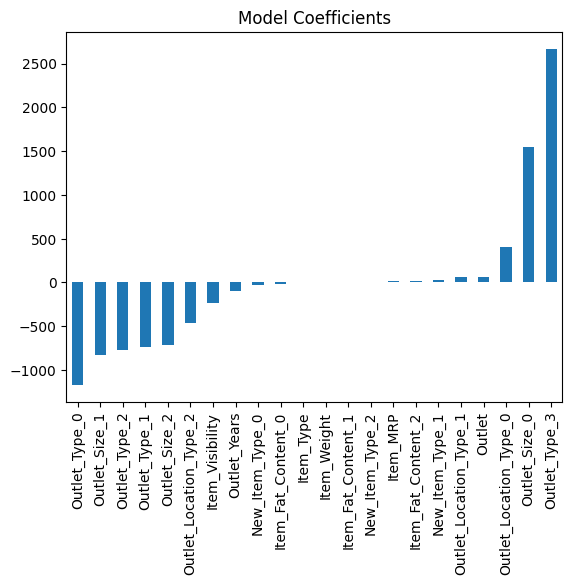

In [16]:
model = LinearRegression()
train(model,x_train,y_train)


Model Report : 

Scoring - neg_mean_squared_error
[ -978645.61868354  -890682.76235813 -1076141.89912721 -1108636.39225609
 -1018503.14375902  -885640.78032804 -1050966.33799287 -1003929.95567006
 -1011959.84689478  -963219.63365565] 

Absolute Average of neg_mean_squared_error :  998832.6370725383

R2 Score
[0.58905845 0.57615186 0.55410102 0.5198411  0.56494942 0.56222893
 0.5775904  0.53248558 0.52762564 0.52019629] 

Average R2 Score :  0.5524228692217683 

Accuracy for Full Data :
R2 Score :  0.5573273692343867 

Outlet_Type_0            -1297.235698
Outlet_Size_1             -591.623432
Outlet_Type_2             -560.230242
Outlet_Size_2             -501.024595
Outlet_Type_1             -438.904993
Outlet_Location_Type_2    -327.260390
Item_Visibility           -227.307839
Outlet_Years               -67.462581
New_Item_Type_0            -26.120575
Item_Fat_Content_0         -19.214345
Item_Type                   -0.151525
Item_Weight                  0.605807
New_Item_Type_2     

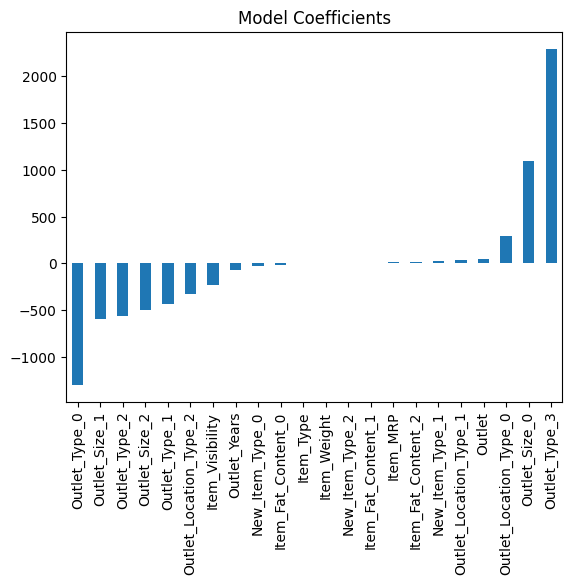

In [142]:
model = Ridge()
train(model,x_train,y_train)


Model Report : 

Scoring - neg_mean_squared_error
[ -980566.31493714  -892571.7328924  -1079533.84344194 -1106170.40609497
 -1023524.69062657  -889792.99318999 -1059322.80029102 -1000056.00053764
 -1018242.39264854  -962661.69039642] 

Absolute Average of neg_mean_squared_error :  1001244.2865056619

R2 Score
[0.58825194 0.57525296 0.55269557 0.52090914 0.56280448 0.56017649
 0.57423173 0.53428962 0.524693   0.52047421] 

Average R2 Score :  0.5513779143222614 

Accuracy for Full Data :
R2 Score :  0.5558349917600521 

Outlet_Type_0            -1847.648081
Outlet_Type_2             -291.353821
Outlet_Size_1              -43.814269
New_Item_Type_0            -30.043635
Item_Fat_Content_0         -10.592866
Outlet_Years                -5.844796
Item_Type                   -0.194513
Outlet_Location_Type_2      -0.000000
Outlet_Location_Type_1      -0.000000
Outlet_Size_2                0.000000
New_Item_Type_2              0.000000
Outlet_Size_0                0.000000
Item_Fat_Content_1 

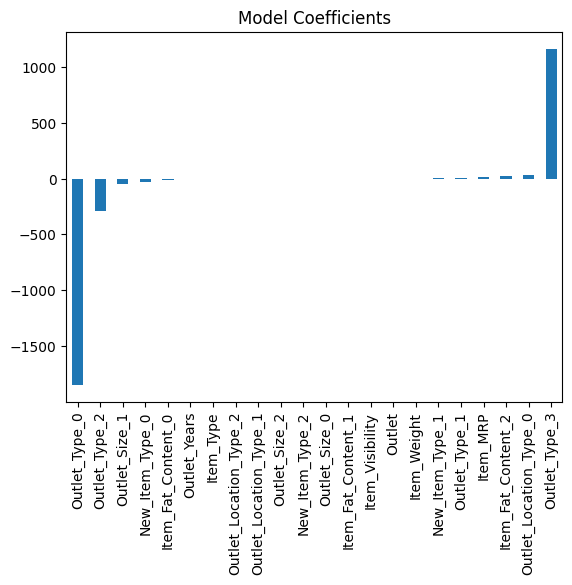

In [143]:
model = Lasso()
train(model,x_train,y_train)

Model Report : 

Scoring - neg_mean_squared_error
[ -978390.74007217  -890438.1655046  -1074959.13309685 -1111380.81196661
 -1017334.68140411  -884740.98441768 -1048718.88633232 -1006075.50613424
 -1009561.5642683   -964608.5331633 ] 

Absolute Average of neg_mean_squared_error :  998620.9006360179

R2 Score
[0.58916548 0.57626826 0.5545911  0.51865247 0.56544852 0.5626737
 0.57849371 0.53148643 0.52874514 0.51950444] 

Average R2 Score :  0.55250292470048 

Accuracy for Full Data :
R2 Score :  0.5574623295245986 

Outlet_Type_0            -1169.066950
Outlet_Size_1             -828.339523
Outlet_Type_2             -767.109074
Outlet_Type_1             -732.557283
Outlet_Size_2             -720.022363
Outlet_Location_Type_2    -463.661912
Item_Visibility           -239.973326
Outlet_Years               -93.057234
New_Item_Type_0            -25.777449
Item_Fat_Content_0         -19.503577
Item_Type                   -0.202632
Item_Weight                  0.593942
Item_Fat_Content_1     

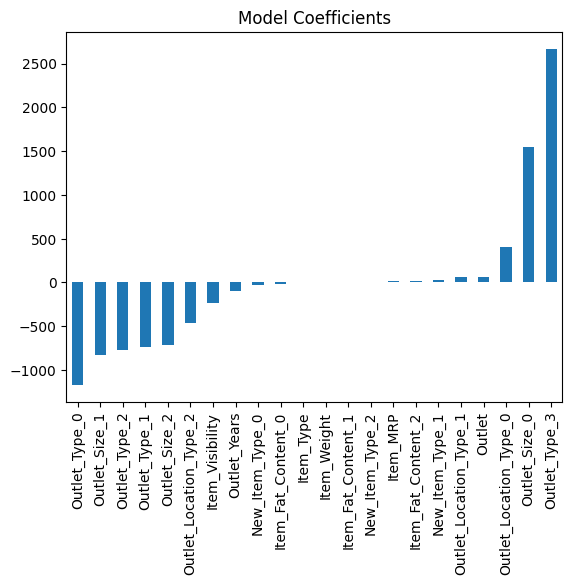

In [144]:
model = LinearRegression()
train(model, x_train, y_train)

Mean Squared Error: 1039300.9255736505


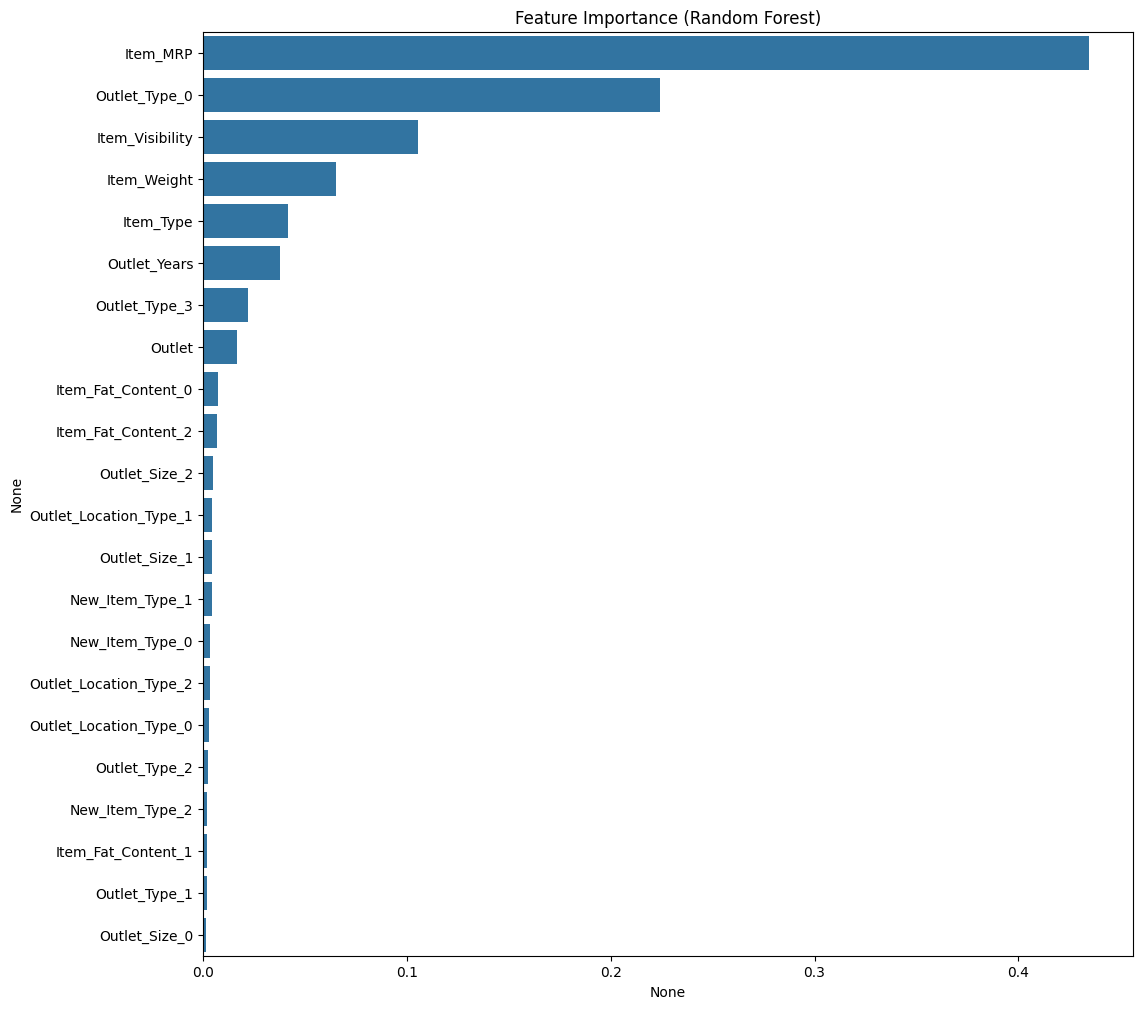

In [145]:
from sklearn.metrics import mean_squared_error 
# Initialize and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# If you need to plot feature importance from a different model like Random Forest:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest with the same data
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

# Evaluate feature importance
importance = rf_model.feature_importances_
features = x_train.columns
feature_importance = pd.Series(importance, index=features).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 12))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance (Random Forest)')
plt.show()

Feature Importance:

The bar chart titled "Feature Importance (Random Forest)" displays the importance of various features in your Random Forest model.

The top features and their importance values are:

Item_MRP (most important)

Outlet_Type

Item_Visibility

Item_Weight

Item_Type

Outlet_Years

Outlet

Item_Fat_Content

New_Item_Type

Outlet_Size

Outlet_Location_Type (least important)

The x-axis represents the importance values, while the y-axis lists the features. Item_MRP stands out as the most influential, while Outlet_Location_Type is the least.

Feature Selection:

Drop low-importance features from the dataset and focus on the most important ones.

In [146]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Outlet_Years', 'Outlet', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'New_Item_Type_0',
       'New_Item_Type_1', 'New_Item_Type_2'],
      dtype='object')

In [147]:
data

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,156,9.300,0.016047,4,249.8092,OUT049,1999,3735.1380,25,9,...,True,False,False,False,True,False,False,False,True,False
1,8,5.920,0.019278,14,48.2692,OUT018,2009,443.4228,15,3,...,False,False,True,False,False,True,False,True,False,False
2,662,17.500,0.016760,10,141.6180,OUT049,1999,2097.2700,25,9,...,True,False,False,False,True,False,False,False,True,False
3,1121,19.200,0.000000,6,182.0950,OUT010,1998,732.3800,26,0,...,False,False,True,True,False,False,False,False,True,False
4,1297,8.930,0.000000,9,53.8614,OUT013,1987,994.7052,37,1,...,False,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8332,370,6.865,0.056783,13,214.5218,OUT013,1987,2778.3834,37,1,...,False,False,True,False,True,False,False,False,True,False
8333,897,8.380,0.046982,0,108.1570,OUT045,2002,549.2850,22,7,...,False,True,False,False,True,False,False,False,True,False
8334,1357,10.600,0.035186,8,85.1224,OUT035,2004,1193.1136,20,6,...,False,True,False,False,True,False,False,False,False,True
8335,681,7.210,0.145221,13,103.1332,OUT018,2009,1845.5976,15,3,...,False,False,True,False,False,True,False,False,True,False


Mean Squared Error: 1097227.1375389998


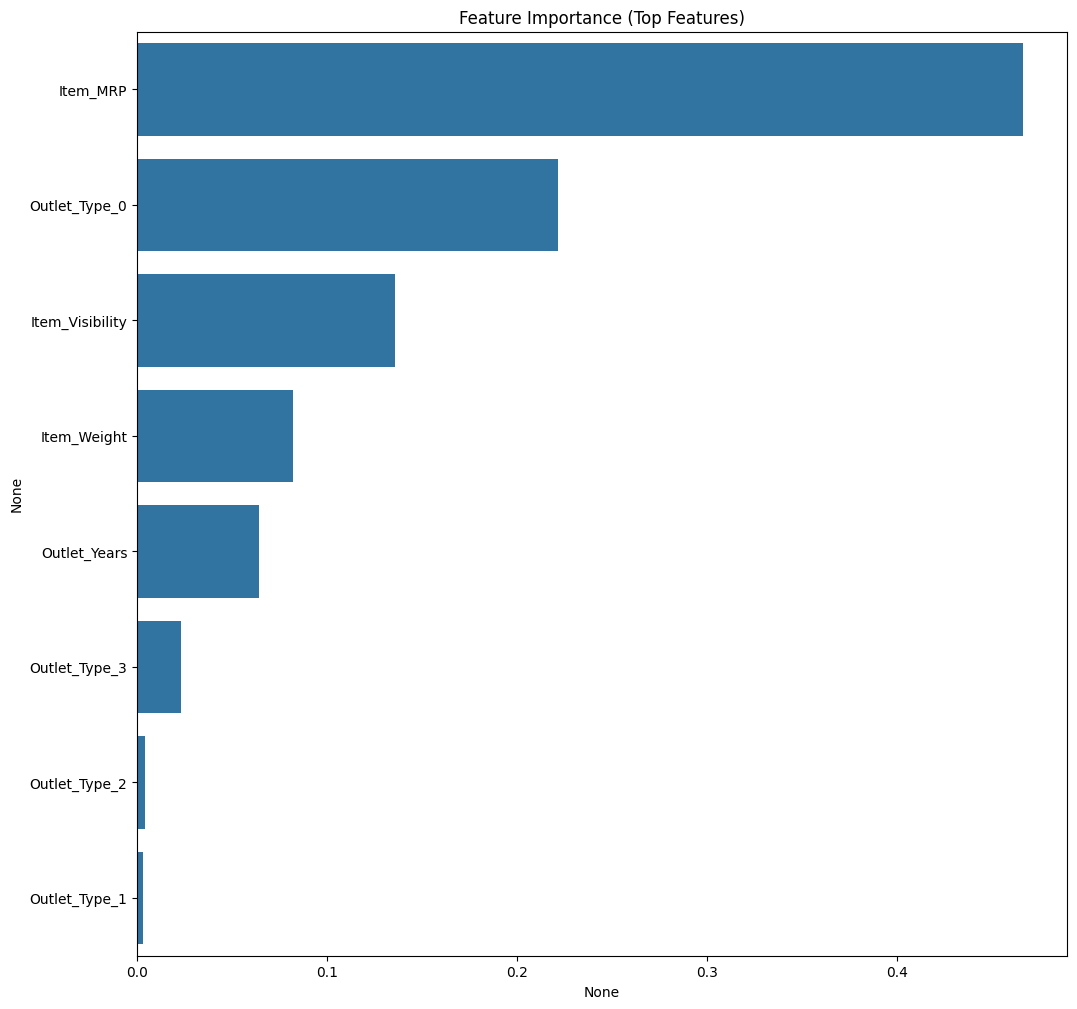

In [9]:
# Ensure all categorical variables are encoded properly
data_encoded = pd.get_dummies(data, drop_first=True)

# Define top features based on previous feature importance
top_features = ['Item_MRP', 'Outlet_Years', 'Item_Visibility', 'Item_Weight', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3']

# Prepare the data with only top features
X_top_features = data_encoded[top_features]
y = data_encoded['Item_Outlet_Sales']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.3, random_state=10)

# Train the model again with top features
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Evaluate the model
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Evaluate feature importance
importance = model.feature_importances_
features = X_top_features.columns
feature_importance = pd.Series(importance, index=features).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 12))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance (Top Features)')
plt.show()


Top Features from Random Forest Model:

Item_MRP

Outlet_Type_0

Item_Visibility

Item_Weight

Outlet_Years

Outlet_Type_3

Outlet_Type_2

Outlet_Type_1

Insights:

Item_MRP: The highest importance score indicates that item price significantly influences sales.

Outlet Type: Different outlet types also play a crucial role in determining sales, with Outlet_Type_0 having the next highest importance.

1. Feature Selection
Identify Top Features:
Focus on the top features: Item_MRP, Outlet_Type, Item_Visibility, Item_Weight, and Outlet_Years

In [149]:
# Prepare the data with only top features
top_features = ['Item_MRP', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Visibility', 'Item_Weight', 'Outlet_Years']
X_top_features = data_encoded[top_features]
y = data_encoded['Item_Outlet_Sales']


Train the Model
Split Data:
Split the data into training and testing sets.

In [150]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.3, random_state=10)


Train with Top Features:
Train the Random Forest model using the selected top features.

Mean Squared Error: 1105981.6132245122


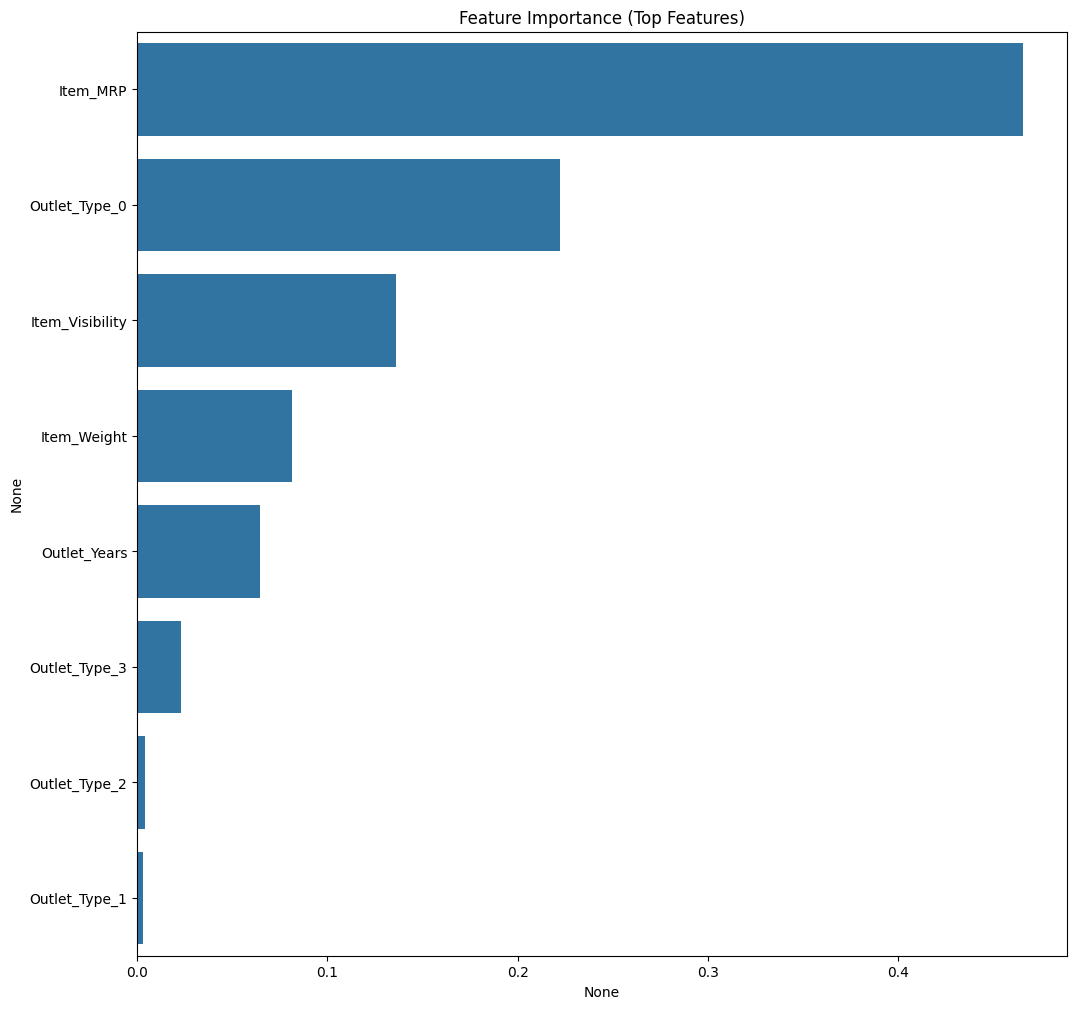

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Evaluate the model
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Evaluate feature importance
importance = model.feature_importances_
features = X_top_features.columns
feature_importance = pd.Series(importance, index=features).sort_values(ascending=False)

# Plot feature importance
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance (Top Features)')
plt.show()


3. Model Refinement
Grid Search for Hyperparameter Tuning:
Use Grid Search to fine-tune the model parameters.

In [152]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model = RandomForestRegressor()

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Retrain model with best parameters
best_model = grid_search.best_estimator_

# Evaluate the refined model
refined_predictions = best_model.predict(x_test)
refined_mse = mean_squared_error(y_test, refined_predictions)
print(f'Refined Mean Squared Error: {refined_mse}')


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Refined Mean Squared Error: 990488.3068057094


In [153]:
# combining models
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf_model = RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300)
rf_model.fit(x_train, y_train)

# Predict
rf_predictions = rf_model.predict(x_test)

from sklearn.linear_model import LinearRegression

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Predict
lr_predictions = lr_model.predict(x_test)

# Average predictions
combined_predictions = (rf_predictions + lr_predictions) / 2
combined_mse=mean_squared_error(y_test, combined_predictions)
print(f'combined Mean Squared Error: {combined_mse}')


combined Mean Squared Error: 981826.5614140519


In [154]:
from sklearn.ensemble import StackingRegressor

# Define the base models
base_models = [
    ('rf', RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300)),
    ('lr', LinearRegression())
]

# Define the meta-model
meta_model = LinearRegression()

# Create the stacking regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(x_train, y_train)

# Predict
stacking_predictions = stacking_model.predict(x_test)

# Evaluate
from sklearn.metrics import mean_squared_error
stacking_mse = mean_squared_error(y_test, stacking_predictions)
print(f'Stacking Model Mean Squared Error: {stacking_mse}')


Stacking Model Mean Squared Error: 978592.0432059125


In [157]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor

# Split data into training and testing  sets
x_train, x_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.3, random_state=10)
# Define base models
base_models = [
    ('rf', RandomForestRegressor(random_state=42)),  

    ('gb', GradientBoostingRegressor(random_state=42)),
    ('lr', LinearRegression())
]

# Define meta-model
meta_model = LinearRegression()

# Create StackingRegressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the model
stacking_model.fit(x_train, y_train)

# Make predictions
y_pred = stacking_model.predict(x_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 962566.4891704009


In [159]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.3, random_state=10)

# Define the parameter grid
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'gb__n_estimators': [100, 200, 300],
    'gb__learning_rate': [0.01, 0.1, 0.2]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'gb__learning_rate': 0.01, 'gb__n_estimators': 300, 'rf__max_depth': 20, 'rf__n_estimators': 300}
Best cross-validation score:  0.5906012557396316


In [33]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
# Define base models with best parameters
base_models = [
    ('rf', RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=300, learning_rate=0.01, random_state=42)),
    ('lr', LinearRegression())
]

# Define meta-model
meta_model = LinearRegression()

# Create StackingRegressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the model
stacking_model.fit(x_train, y_train)

# Make predictions
final_predictions = stacking_model.predict(x_test)

# Evaluate performance
final_mse = mean_squared_error(y_test, final_predictions)
print("Final Mean Squared Error:", final_mse)


Final Mean Squared Error: 955477.0070885248


1. Display Data Insights
Descriptive Statistics:

In [18]:
data_encoded.describe()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet
count,8337.000000,8337.000000,8337.000000,8337.000000,8337.000000,8337.000000,8337.000000,8337.000000,8337.000000
mean,779.462756,12.856638,0.066358,7.225261,139.161087,1997.968094,2059.362844,26.031906,4.717884
std,449.440681,4.250410,0.051838,4.211323,61.553351,8.309941,1506.099754,8.309941,2.853014
min,0.000000,4.555000,0.000000,0.000000,31.290000,1985.000000,33.290000,15.000000,0.000000
25%,395.000000,9.300000,0.027028,4.000000,93.046200,1987.000000,810.944400,20.000000,2.000000
50%,783.000000,12.857645,0.053939,6.000000,141.215400,1999.000000,1747.059200,25.000000,5.000000
75%,1167.000000,16.100000,0.095299,10.000000,183.695000,2004.000000,2998.097400,37.000000,7.000000
max,1558.000000,21.350000,0.328391,15.000000,266.888400,2009.000000,6478.234000,39.000000,9.000000


2. Visualize Data Distribution

Histogram for Item Outlet Sales:

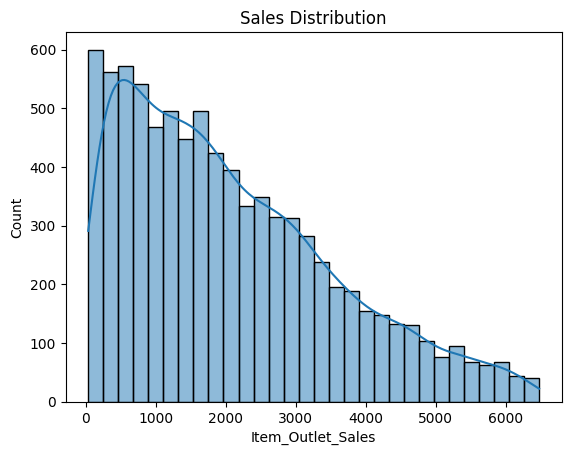

In [20]:
sns.histplot(data_encoded['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.show()


Box Plot for Important Features:

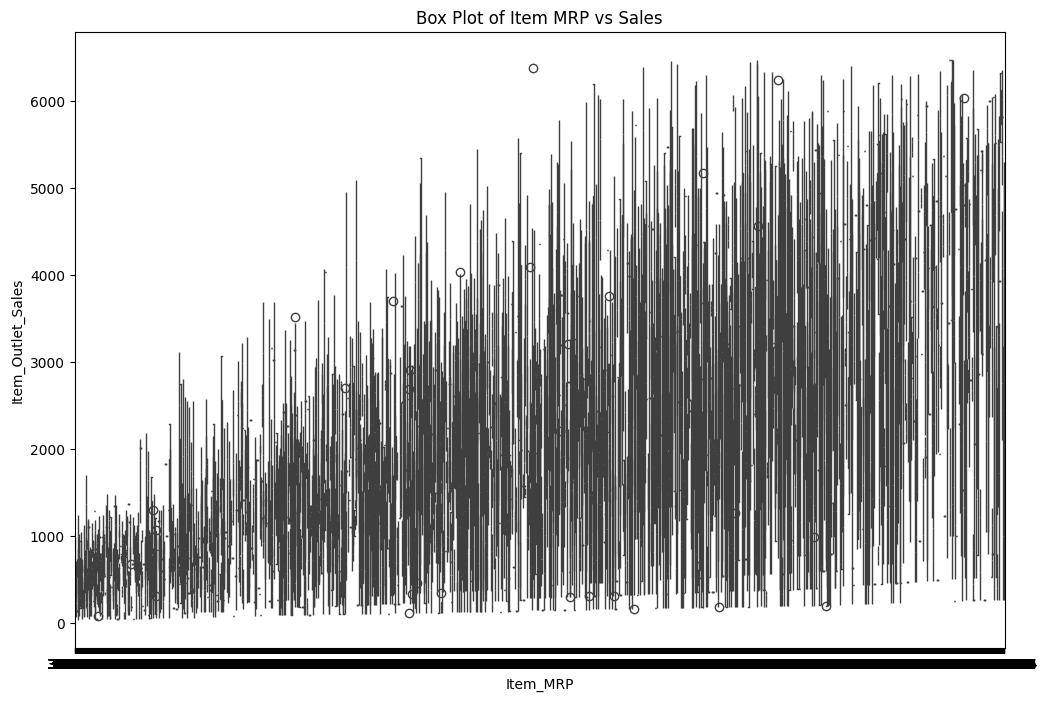

In [27]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_encoded, x='Item_MRP', y='Item_Outlet_Sales')
plt.title('Box Plot of Item MRP vs Sales')
plt.show()

3. Visualize Model Performance
Feature Importance (Random Forest):

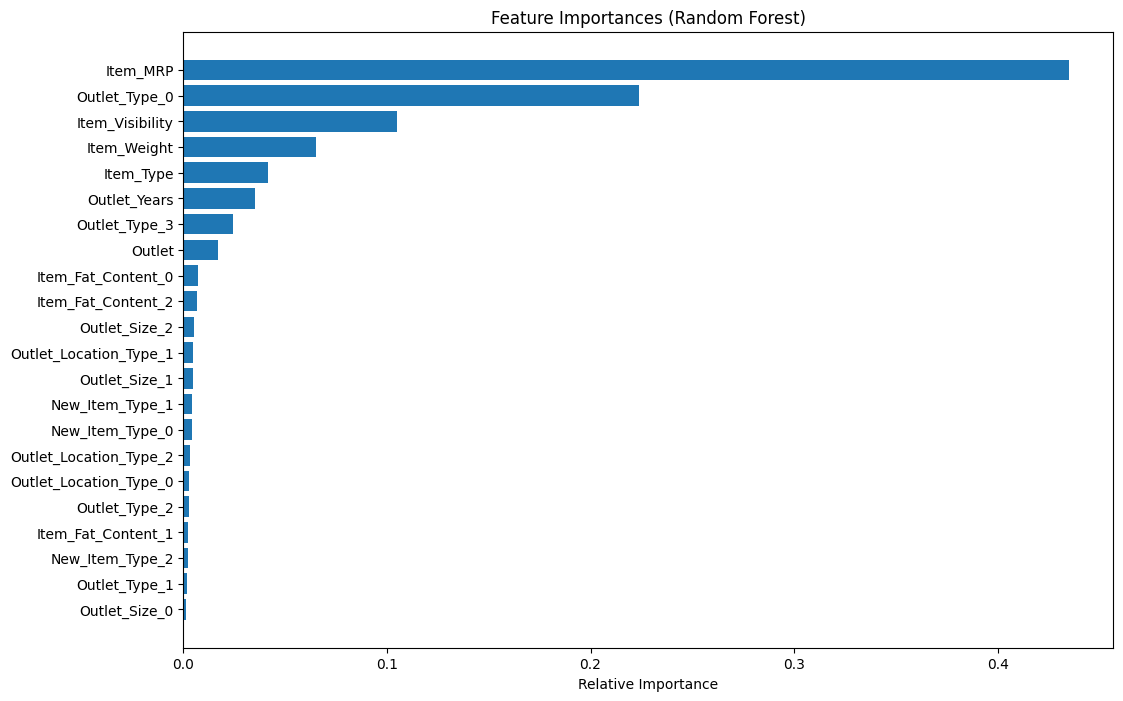

In [25]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 8))
plt.title('Feature Importances (Random Forest)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [x.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Actual vs Predicted Sales:

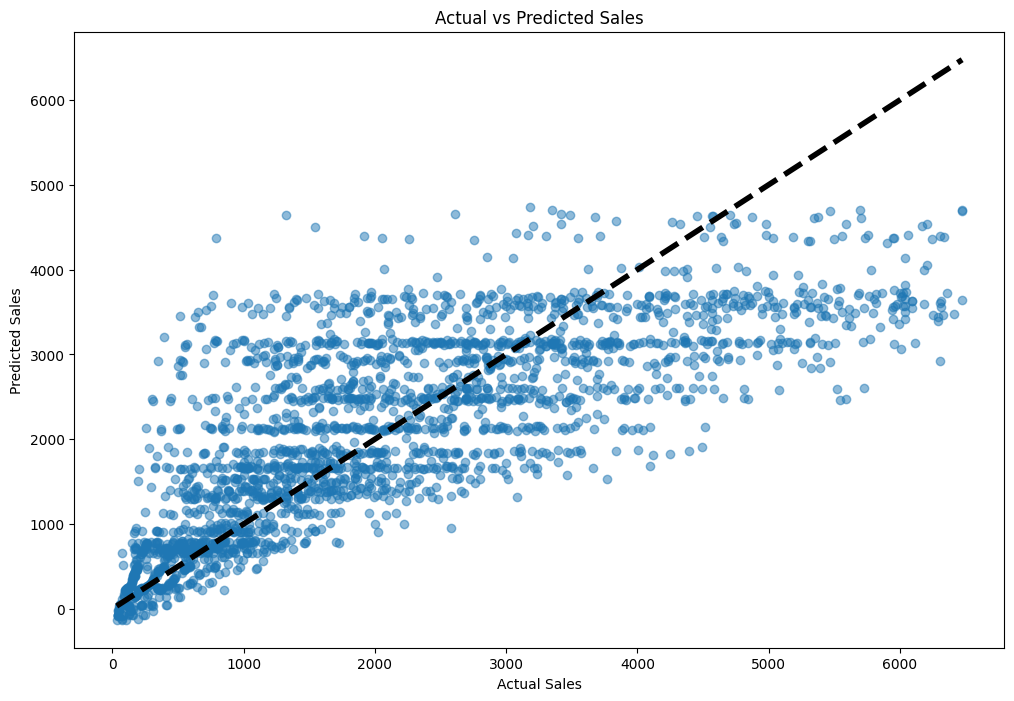

In [35]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, final_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

4. Detailed Model Evaluation
Cross-Validation Scores:

In [36]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(stacking_model, X_top_features, y, cv=10, scoring='neg_mean_squared_error')
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.abs(cv_scores.mean())}')

Cross-Validation Scores: [ -952547.39430149  -989982.70016076  -960070.53455425  -889514.04565316
 -1003911.53453033  -830500.26117761  -870144.78827608  -960465.98379097
  -898497.46802944  -940061.57865781]
Mean Cross-Validation Score: 929569.6289131887


Learning Curve:

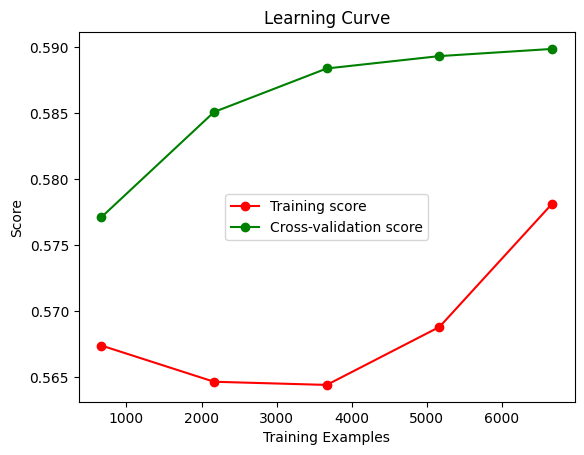

In [37]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(stacking_model, X_top_features, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

The training score starts around 0.567, dips slightly, then rises to about 0.575.

The cross-validation score starts around 0.575 and steadily increases to about 0.590.

The model's performance improves with more training data, indicating better generalization with additional examples.

In [42]:
import joblib

# Save the model
joblib.dump(stacking_model, 'stacking_model.pkl')

['stacking_model.pkl']

deployment

In [40]:
import mlflow
from mlflow.tracking import MlflowClient

# Start tracking
mlflow.start_run()

# Log parameters and metrics
mlflow.log_param("model_type", "StackingRegressor")
mlflow.log_param("rf_n_estimators", 300)
mlflow.log_param("rf_max_depth", 20)
mlflow.log_metric("MSE", final_mse)

# End tracking
mlflow.end_run()

2. Deployment
Objective: Deploy the model via a web app or dashboard.

Using Flask:

In [1]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib
from flask import Flask, request, jsonify

app = Flask(__name__)

# Load the model
model = joblib.load(r"D:\IBM data science\stacking_model.pkl")

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict([data['features']])
    return jsonify(prediction=prediction[0])

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\MARK8\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [10]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you already have data loaded into X and y
X = data_encoded.drop(columns=['Item_Outlet_Sales'])
y = data_encoded['Item_Outlet_Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base models with best parameters
base_models = [
    ('rf', RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=300, learning_rate=0.01, random_state=42)),
    ('lr', LinearRegression())
]

# Define meta-model
meta_model = LinearRegression()

# Create StackingRegressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

with mlflow.start_run():
    # Train your model
    stacking_model.fit(X_train, y_train)
    
    # Make predictions
    final_predictions = stacking_model.predict(X_test)
    
    # Evaluate performance
    final_mse = mean_squared_error(y_test, final_predictions)
    
    # Log parameters, metrics, and model
    mlflow.log_param("model_type", "StackingRegressor")
    mlflow.log_param("rf_n_estimators", 300)
    mlflow.log_param("rf_max_depth", 20)
    mlflow.log_param("gb_n_estimators", 300)
    mlflow.log_param("gb_learning_rate", 0.01)
    mlflow.log_metric("MSE", final_mse)
    mlflow.sklearn.log_model(stacking_model, "model", registered_model_name="SalesForecastingModel")

    print("Final Mean Squared Error:", final_mse)


2024/10/24 12:24:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Final Mean Squared Error: 924270.3333695207


Successfully registered model 'SalesForecastingModel'.
Created version '1' of model 'SalesForecastingModel'.


In [12]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have data loaded into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

base_models = [
    ('rf', RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=300, learning_rate=0.01, random_state=42)),
    ('lr', LinearRegression())
]

meta_model = LinearRegression()
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

with mlflow.start_run() as run:
    stacking_model.fit(X_train, y_train)
    final_predictions = stacking_model.predict(X_test)
    final_mse = mean_squared_error(y_test, final_predictions)

    mlflow.log_param("model_type", "StackingRegressor")
    mlflow.log_param("rf_n_estimators", 300)
    mlflow.log_param("rf_max_depth", 20)
    mlflow.log_param("gb_n_estimators", 300)
    mlflow.log_param("gb_learning_rate", 0.01)
    mlflow.log_metric("MSE", final_mse)
    mlflow.sklearn.log_model(stacking_model, "model")

    run_id = run.info.run_id
    print("Run ID:", run_id)


2024/10/24 12:31:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: 3ebf1c184d58404faaca1200f394c3ae


In [15]:
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have data loaded into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

base_models = [
    ('rf', RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=300, learning_rate=0.01, random_state=42)),
    ('lr', LinearRegression())
]

meta_model = LinearRegression()
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

with mlflow.start_run() as run:
    # Fit the model
    stacking_model.fit(X_train, y_train)
    
    # Example input data
    input_example = X_train.iloc[:5]
    
    # Infer the model signature
    signature = infer_signature(X_train, stacking_model.predict(X_train))
    
    # Make predictions
    final_predictions = stacking_model.predict(X_test)
    
    # Evaluate performance
    final_mse = mean_squared_error(y_test, final_predictions)

    # Log parameters, metrics, and model
    mlflow.log_param("model_type", "StackingRegressor")
    mlflow.log_param("rf_n_estimators", 300)
    mlflow.log_param("rf_max_depth", 20)
    mlflow.log_param("gb_n_estimators", 300)
    mlflow.log_param("gb_learning_rate", 0.01)
    mlflow.log_metric("MSE", final_mse)
    mlflow.sklearn.log_model(stacking_model, "model", input_example=input_example, signature=signature, registered_model_name="SalesForecastingModel")

    print("Run ID:", run.info.run_id)


c:\Users\MARK8\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Registered model 'SalesForecastingModel' already exists. Creating a new version of this model...
Created version '2' of model 'SalesForecastingModel'.


Run ID: cf207b7a784d446ba337d378f8533915


In [22]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X and y are defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

base_models = [
    ('rf', RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=300, learning_rate=0.01, random_state=42)),
    ('lr', LinearRegression())
]

meta_model = LinearRegression()
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

with mlflow.start_run() as run:
    for epoch in range(1, 11):  # Assuming 10 epochs
        stacking_model.fit(X_train, y_train)
        predictions = stacking_model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        accuracy = stacking_model.score(X_test, y_test)

        # Log metrics with epoch suffix
        mlflow.log_metric(f"accuracy_{epoch}", accuracy)
        mlflow.log_metric(f"mse_{epoch}", mse)

    mlflow.sklearn.log_model(stacking_model, "model")

    print("Run ID:", run.info.run_id)


2024/10/24 13:40:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: a713548733f54625baa341db05d8ae02


In [24]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have data loaded into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

base_models = [
    ('rf', RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=300, learning_rate=0.01, random_state=42)),
    ('lr', LinearRegression())
]

meta_model = LinearRegression()
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

with mlflow.start_run() as run:
    for epoch in range(1, 11):  # Assuming 10 epochs
        stacking_model.fit(X_train, y_train)
        predictions = stacking_model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        accuracy = stacking_model.score(X_test, y_test)

        # Log metrics with epoch suffix
        mlflow.log_metric(f"accuracy_{epoch}", accuracy)
        mlflow.log_metric(f"mse_{epoch}", mse)

    mlflow.sklearn.log_model(stacking_model, "model")

    print("Run ID:", run.info.run_id)


2024/10/24 13:55:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: ae3a92060ab7413cb03c42410cb05d84


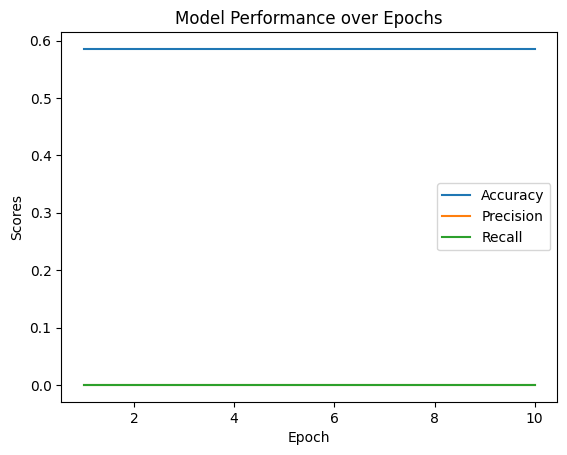

In [29]:
import mlflow
from mlflow.tracking import MlflowClient
import matplotlib.pyplot as plt

client = MlflowClient()
run_id = "ae3a92060ab7413cb03c42410cb05d84"  # Replace with your actual run ID
run = client.get_run(run_id)
metrics = run.data.metrics

epochs = range(1, 11)
accuracy = [metrics.get(f'accuracy_{epoch}', 0) for epoch in epochs]
precision = [metrics.get(f'precision_{epoch}', 0) for epoch in epochs]
recall = [metrics.get(f'recall_{epoch}', 0) for epoch in epochs]

plt.plot(epochs, accuracy, label='Accuracy')
plt.plot(epochs, precision, label='Precision')
plt.plot(epochs, recall, label='Recall')
plt.xlabel("Epoch")
plt.ylabel("Scores")
plt.title("Model Performance over Epochs")
plt.legend()
plt.show()


In [34]:
import streamlit as st
import joblib

model = joblib.load('stacking_model.pkl')

st.title("Sales Forecasting App")
features = st.text_input("Enter features separated by commas")

if st.button("Predict"):
    features_list = [float(i) for i in features.split(',')]
    prediction = model.predict([features_list])
    st.write(f"Predicted Sales: {prediction[0]}")

2024-10-24 14:12:51.219 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-24 14:12:51.340 
  command:

    streamlit run C:\Users\MARK8\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-24 14:12:51.341 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-24 14:12:51.342 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-24 14:12:51.342 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-24 14:12:51.343 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-24 14:12:51.344 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-24 14:12:51.344 Sess